# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [41]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io


url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"

response = requests.get(url)
#print(response.text)
if response.status_code == 200:
    html_parseado = BeautifulSoup(response.text, "html.parser")

print(html_parseado)   
print("-------------------------")
print("El estado de solicitud es:", response.status_code)



<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Spotify streaming records - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-conten

In [42]:
html = io.StringIO(response.text)
tables = pd.read_html(html)
print(f"Se encontraron {len(tables)} tablas.")

df = tables[0]
df.head()

Se encontraron 27 tablas.


,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.897,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.421,6 January 2017,[3]
2,3,"""Starboy""",The Weeknd and Daft Punk,3.956,21 September 2016,[4]
3,4,"""Someone You Loved""",Lewis Capaldi,3.947,8 November 2018,[5]
4,5,"""As It Was""",Harry Styles,3.936,1 April 2022,[6]


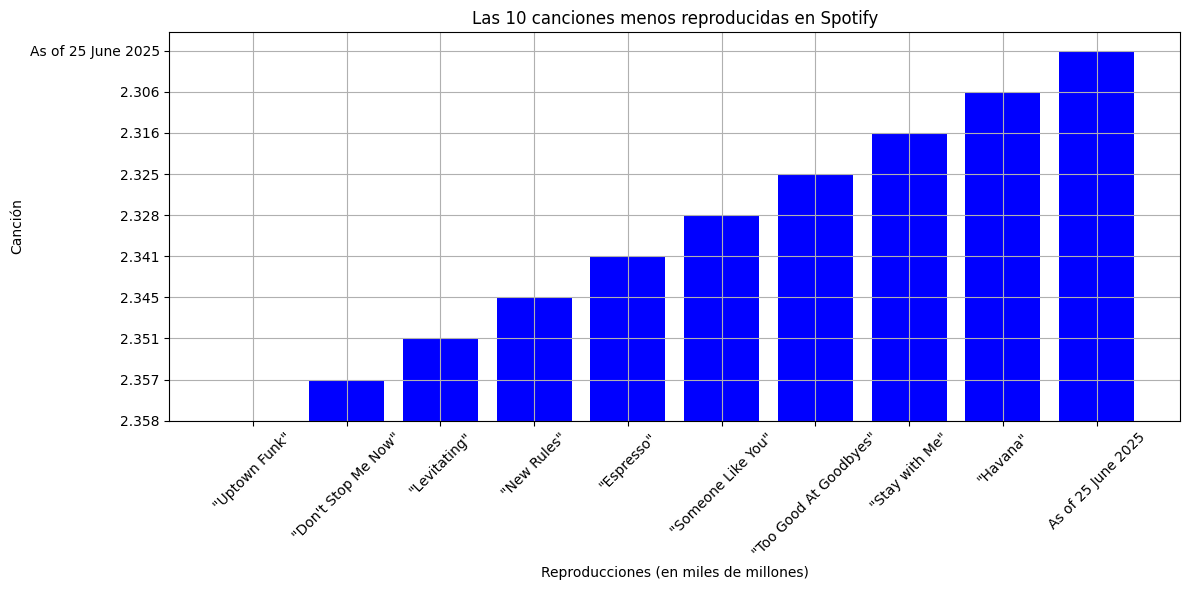

In [43]:
df_top10 = df.tail(10)
#print(df_top10)
plt.figure(figsize=(12, 6))
plt.bar(df_top10["Song"], df_top10["Streams (billions)"], color = "blue")
plt.title("Las 10 canciones menos reproducidas en Spotify")
plt.xlabel("Reproducciones (en miles de millones)")
plt.ylabel("Canción")
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_750/1769598050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= mas_escuchadas, x = "Streams (billions)", y = "Song", palette = "viridis")


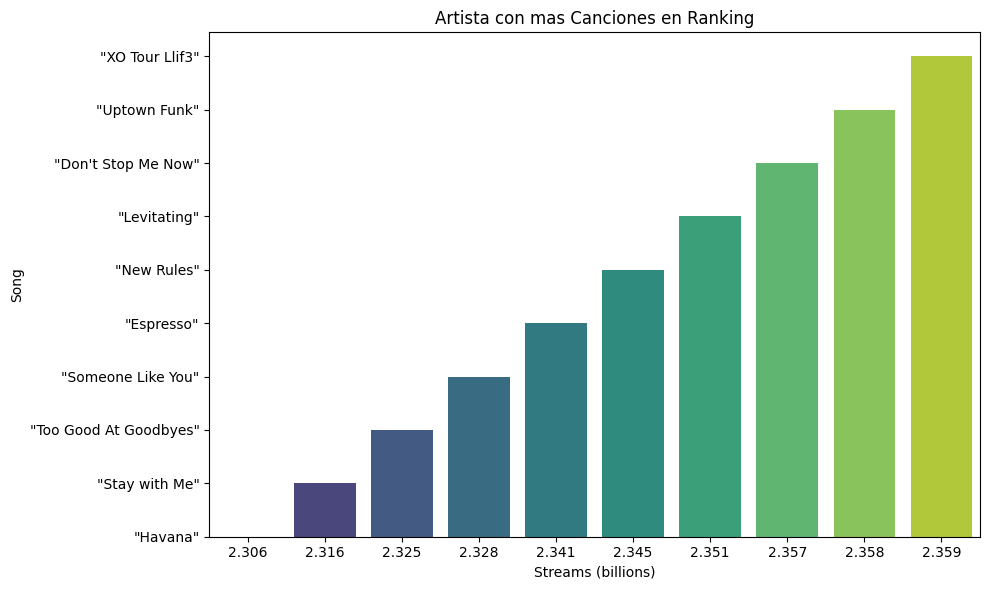

In [44]:

mas_escuchadas = df.sort_values("Streams (billions)").head(10)
plt.figure(figsize=(10,6))
sns.barplot(data= mas_escuchadas, x = "Streams (billions)", y = "Song", palette = "viridis")
plt.title("Artista con mas Canciones en Ranking")
plt.xlabel("Streams (billions)")
plt.ylabel("Song")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

/tmp/ipykernel_750/3118633901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= mas_escuchadas, x = "Artist(s)", y = "Rank", palette = "viridis")


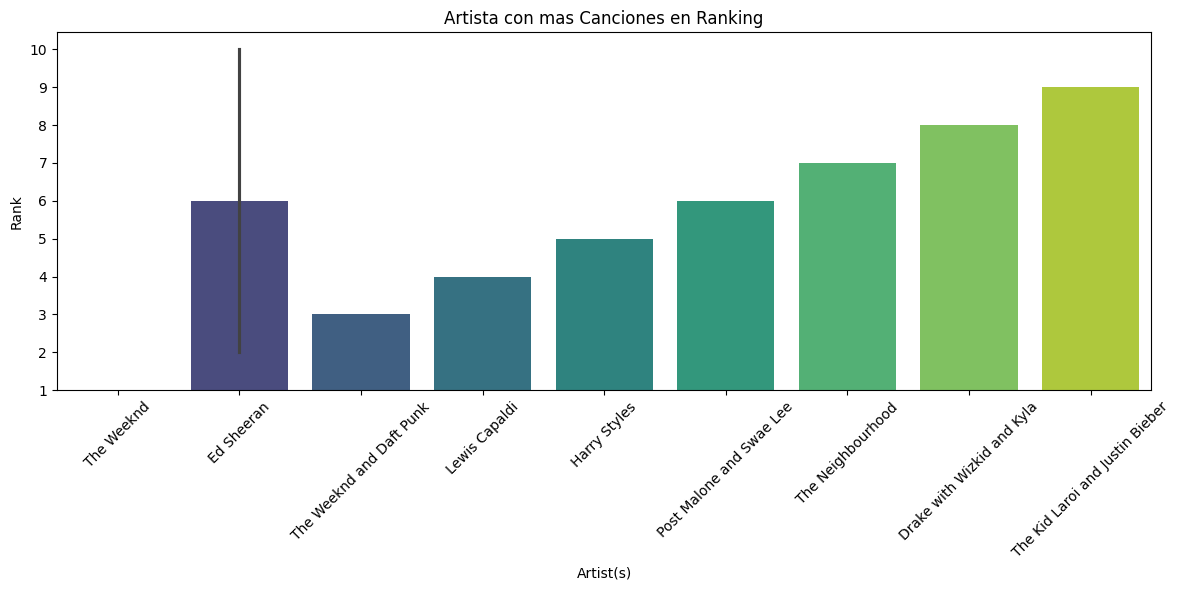

In [45]:

sin_primer_indice=df[df["Song"] !="As of 25 June 2025"]
mas_escuchadas = sin_primer_indice.sort_values("Streams (billions)", ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data= mas_escuchadas, x = "Artist(s)", y = "Rank", palette = "viridis")
plt.title("Artista con mas Canciones en Ranking")
plt.xlabel("Artist(s)")
plt.ylabel("Rank")
plt.gca().invert_yaxis()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()